In [223]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# configurations
pd.options.display.float_format = "{:,.1f}".format
plt.style.use("ggplot")
matplotlib.rcParams['figure.figsize'] = (12,8)
%matplotlib inline

# read csv file
mov_df= pd.read_csv(r"C:\Users\jasdh\OneDrive\Desktop\Python\Intro Scripts\Data Science\movies.csv")

# look at the data
mov_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,"927,000.0",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.0","46,998,772.0",Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,"65,000.0",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.0","58,853,106.0",Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,"1,200,000.0",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.0","538,375,067.0",Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,"221,000.0",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.0","83,453,539.0",Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,"108,000.0",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.0","39,846,344.0",Orion Pictures,98.0


In [224]:
# get size of dataframe
mov_df.shape

(7668, 15)

In [225]:
# identify data losses
for col in mov_df.columns:
    pct_missing = np.mean(mov_df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [226]:
# Calculating the count of missing values in different columns
mov_df.isnull().sum().sort_values(ascending=False)

budget      2171
gross        189
rating        77
company       17
runtime        4
score          3
votes          3
writer         3
country        3
released       2
star           1
name           0
genre          0
year           0
director       0
dtype: int64

In [227]:
# Removing Missing Values
df = mov_df.dropna()

In [228]:
# Calculating the count of missing values in different columns
df.isnull().sum().sort_values(ascending=False)

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [229]:
# get new size of dataframe
df.shape

(5421, 15)

In [230]:
# identify data types in the raw data
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [232]:
# calculate profits and general success of the films
df.loc[:,'profit'] = df.loc[:,'gross'] - df.loc[:,'budget']
df.loc[:,'outcome']= df.loc[:,'profit'].apply(lambda x: 'Hit' if x > 0 else 'Flop')
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,profit,outcome
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,"927,000.0",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.0","46,998,772.0",Warner Bros.,146.0,"27,998,772.0",Hit
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,"65,000.0",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.0","58,853,106.0",Columbia Pictures,104.0,"54,353,106.0",Hit
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,"1,200,000.0",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.0","538,375,067.0",Lucasfilm,124.0,"520,375,067.0",Hit
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,"221,000.0",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.0","83,453,539.0",Paramount Pictures,88.0,"79,953,539.0",Hit
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,"108,000.0",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.0","39,846,344.0",Orion Pictures,98.0,"33,846,344.0",Hit
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,"123,000.0",Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,"550,000.0","39,754,601.0",Paramount Pictures,95.0,"39,204,601.0",Hit
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,"188,000.0",John Landis,Dan Aykroyd,John Belushi,United States,"27,000,000.0","115,229,890.0",Universal Pictures,133.0,"88,229,890.0",Hit
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,"330,000.0",Martin Scorsese,Jake LaMotta,Robert De Niro,United States,"18,000,000.0","23,402,427.0",Chartoff-Winkler Productions,129.0,"5,402,427.0",Hit
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,"101,000.0",Richard Lester,Jerry Siegel,Gene Hackman,United States,"54,000,000.0","108,185,706.0",Dovemead Films,127.0,"54,185,706.0",Hit
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,"10,000.0",Walter Hill,Bill Bryden,David Carradine,United States,"10,000,000.0","15,795,189.0",United Artists,100.0,"5,795,189.0",Hit


In [234]:
# get the proper year
df.loc[:,'released'].astype('str')    # convert column 'released' to string
df.loc[:,'year_adj'] = df.loc[:,'released'].str.extract(', (\d{4})\s*\(')    # extract everything between the ", " and "("
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,profit,outcome,year_adj
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,"927,000.0",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.0","46,998,772.0",Warner Bros.,146.0,"27,998,772.0",Hit,NaN
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,"65,000.0",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.0","58,853,106.0",Columbia Pictures,104.0,"54,353,106.0",Hit,NaN
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,"1,200,000.0",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.0","538,375,067.0",Lucasfilm,124.0,"520,375,067.0",Hit,NaN
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,"221,000.0",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.0","83,453,539.0",Paramount Pictures,88.0,"79,953,539.0",Hit,NaN
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,"108,000.0",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.0","39,846,344.0",Orion Pictures,98.0,"33,846,344.0",Hit,NaN
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,"123,000.0",Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,"550,000.0","39,754,601.0",Paramount Pictures,95.0,"39,204,601.0",Hit,NaN
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,"188,000.0",John Landis,Dan Aykroyd,John Belushi,United States,"27,000,000.0","115,229,890.0",Universal Pictures,133.0,"88,229,890.0",Hit,NaN
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,"330,000.0",Martin Scorsese,Jake LaMotta,Robert De Niro,United States,"18,000,000.0","23,402,427.0",Chartoff-Winkler Productions,129.0,"5,402,427.0",Hit,NaN
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,"101,000.0",Richard Lester,Jerry Siegel,Gene Hackman,United States,"54,000,000.0","108,185,706.0",Dovemead Films,127.0,"54,185,706.0",Hit,NaN
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,"10,000.0",Walter Hill,Bill Bryden,David Carradine,United States,"10,000,000.0","15,795,189.0",United Artists,100.0,"5,795,189.0",Hit,NaN


In [235]:
# group by year and sort by budget
movies_with_highest_budget = df.groupby('year').apply(lambda x: x.loc[x['budget'].idxmax()])
movies_with_highest_budget.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,profit,outcome,year_adj
year,,,,,,,,,,,,,,,,,,
1980,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,"101,000.0",Richard Lester,Jerry Siegel,Gene Hackman,United States,"54,000,000.0","108,185,706.0",Dovemead Films,127.0,"54,185,706.0",Hit,NaN
1981,Inchon,PG,Drama,1981,"September 17, 1982 (United States)",2.7,659.0,Terence Young,Robin Moore,Laurence Olivier,South Korea,"46,000,000.0","5,200,986.0",One Way Productions,140.0,"-40,799,014.0",Flop,NaN
1982,Annie,PG,Comedy,1982,"June 18, 1982 (United States)",6.6,"41,000.0",John Huston,Carol Sobieski,Aileen Quinn,United States,"50,000,000.0","57,063,861.0",Columbia Pictures,127.0,"7,063,861.0",Hit,NaN
1983,Krull,PG,Action,1983,"July 29, 1983 (United States)",6.1,"31,000.0",Peter Yates,Stanford Sherman,Ken Marshall,United Kingdom,"47,000,000.0","16,916,617.0",Columbia Pictures,121.0,"-30,083,383.0",Flop,NaN
1984,The Cotton Club,R,Crime,1984,"December 14, 1984 (United States)",6.5,"17,000.0",Francis Ford Coppola,William Kennedy,Richard Gere,United States,"58,000,000.0","25,928,721.0",Zoetrope Studios,127.0,"-32,071,279.0",Flop,NaN
1985,Santa Claus: The Movie,PG,Adventure,1985,"November 27, 1985 (United States)",6.3,"12,000.0",Jeannot Szwarc,David Newman,Dudley Moore,United Kingdom,"50,000,000.0","23,717,291.0",GGG,107.0,"-26,282,709.0",Flop,NaN
1986,Pirates,PG-13,Action,1986,"July 18, 1986 (United States)",6.1,"8,100.0",Roman Polanski,John Brownjohn,Walter Matthau,France,"40,000,000.0","1,641,825.0",Carthago Films S.a.r.l.,121.0,"-38,358,175.0",Flop,NaN
1987,Ishtar,PG-13,Action,1987,"May 15, 1987 (United States)",4.5,"11,000.0",Elaine May,Elaine May,Warren Beatty,United States,"55,000,000.0","14,375,181.0",Columbia Pictures,107.0,"-40,624,819.0",Flop,NaN
1988,Who Framed Roger Rabbit,PG,Animation,1988,"June 22, 1988 (United States)",7.7,"187,000.0",Robert Zemeckis,Gary K. Wolf,Bob Hoskins,United States,"70,000,000.0","329,803,958.0",Touchstone Pictures,104.0,"259,803,958.0",Hit,NaN


In [236]:
# count the number of hits and flops
hit_count = len(movies_with_highest_budget[movies_with_highest_budget['outcome']=="Hit"])
flop_count = len(movies_with_highest_budget[movies_with_highest_budget['outcome'] == "Flop"])

print(f"Number of Hit Films: {hit_count}")
print(f"Number of Flop Films: {flop_count}")

Number of Hit Films: 35
Number of Flop Films: 6


In [237]:
# Sort by gross revenue
df = df.sort_values(by=['gross'], inplace = False, ascending = False)

In [238]:
# Look at top 10 films by gross revenue
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,profit,outcome,year_adj
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,"1,100,000.0",James Cameron,James Cameron,Sam Worthington,United States,"237,000,000.0","2,847,246,203.0",Twentieth Century Fox,162.0,"2,610,246,203.0",Hit,NaN
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,"903,000.0",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,"356,000,000.0","2,797,501,328.0",Marvel Studios,181.0,"2,441,501,328.0",Hit,NaN
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,"1,100,000.0",James Cameron,James Cameron,Leonardo DiCaprio,United States,"200,000,000.0","2,201,647,264.0",Twentieth Century Fox,194.0,"2,001,647,264.0",Hit,NaN
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,"876,000.0",J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,"245,000,000.0","2,069,521,700.0",Lucasfilm,138.0,"1,824,521,700.0",Hit,NaN
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,"897,000.0",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,"321,000,000.0","2,048,359,754.0",Marvel Studios,149.0,"1,727,359,754.0",Hit,NaN


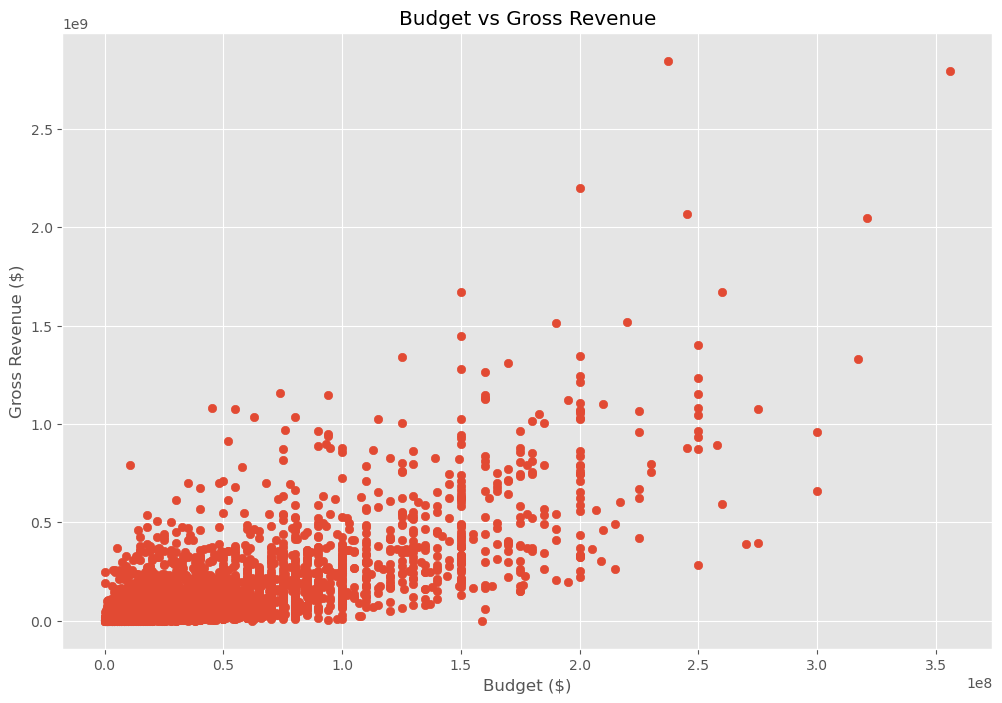

In [239]:
# Build a scatterplot of the budget vs gross revenue
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget ($)')
plt.ylabel('Gross Revenue ($)')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

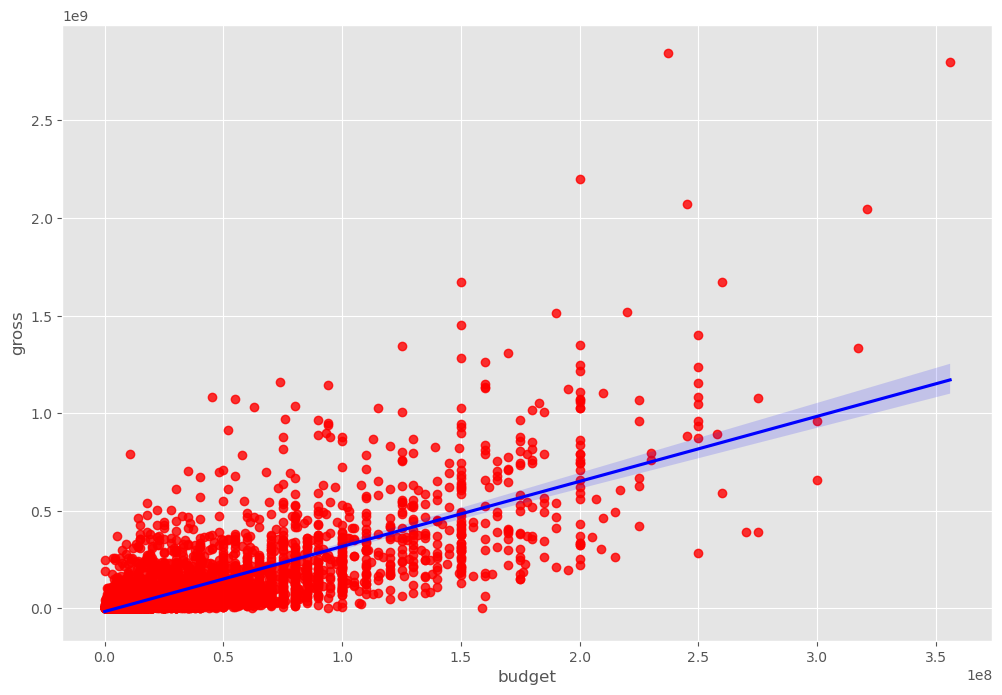

In [240]:
# plot the budget vs gross using seaborn for a regression plot
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color" : "red"}, line_kws = {"color" : "blue"})

In [241]:
# look at more correlations, only include numerical data types
numeric_df = df.select_dtypes(include=['number'])    # default is pearson method of correlation (pearson, kendall, spearman)
numeric_df.corr(method = 'pearson')    # not sure why it's rounding the correlation values

,year,score,votes,budget,gross,runtime,profit
year,1.0,0.1,0.2,0.3,0.3,0.1,0.2
score,0.1,1.0,0.5,0.1,0.2,0.4,0.2
votes,0.2,0.5,1.0,0.4,0.6,0.4,0.6
budget,0.3,0.1,0.4,1.0,0.7,0.3,0.6
gross,0.3,0.2,0.6,0.7,1.0,0.3,1.0
runtime,0.1,0.4,0.4,0.3,0.3,1.0,0.2
profit,0.2,0.2,0.6,0.6,1.0,0.2,1.0


Text(120.72222222222221, 0.5, 'Movie Characteristics')

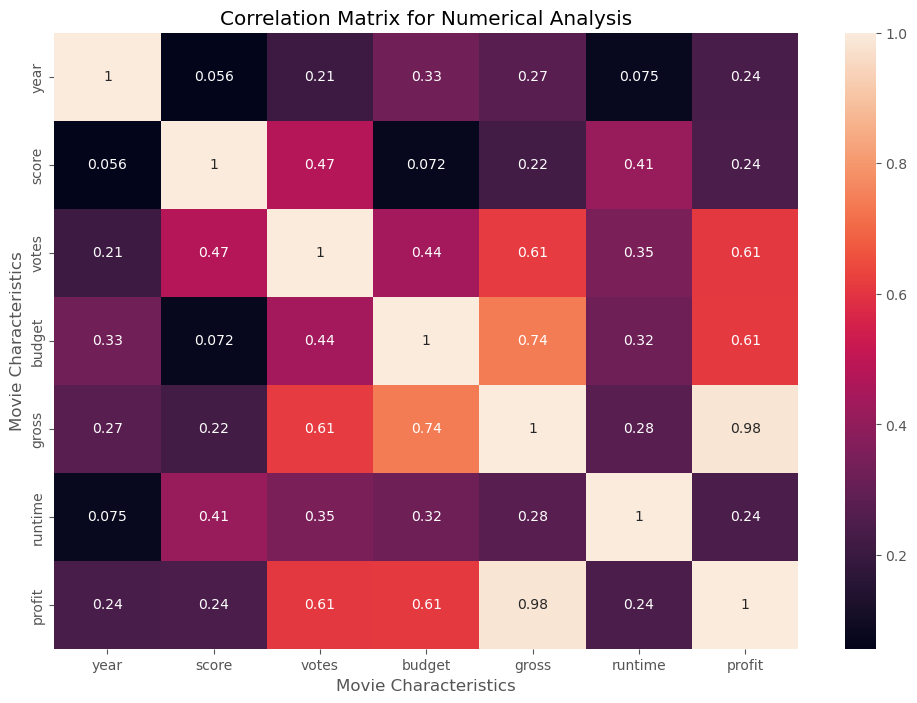

In [242]:
# visualize the correlations through a heatmap
corr_matrix = numeric_df.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Matrix for Numerical Analysis')
plt.xlabel('Movie Characteristics')
plt.ylabel('Movie Characteristics')

In [243]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,profit,outcome,year_adj
5445,386,5,0,2009,527,7.8,"1,100,000.0",785,1263,1534,47,"237,000,000.0","2,847,246,203.0",1382,162.0,"2,610,246,203.0",1,-1
7445,388,5,0,2019,137,8.4,"903,000.0",105,513,1470,47,"356,000,000.0","2,797,501,328.0",983,181.0,"2,441,501,328.0",1,-1
3045,4909,5,6,1997,534,7.8,"1,100,000.0",785,1263,1073,47,"200,000,000.0","2,201,647,264.0",1382,194.0,"2,001,647,264.0",1,-1
6663,3643,5,0,2015,529,7.8,"876,000.0",768,1806,356,47,"245,000,000.0","2,069,521,700.0",945,138.0,"1,824,521,700.0",1,-1
7244,389,5,0,2018,145,8.4,"897,000.0",105,513,1470,47,"321,000,000.0","2,048,359,754.0",983,149.0,"1,727,359,754.0",1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5.8,"3,500.0",585,2924,1498,47,"3,000,000.0","5,073.0",1385,96.0,"-2,994,927.0",0,-1
2434,2969,5,0,1993,1467,4.5,"1,900.0",1805,3102,186,47,"5,000,000.0","2,970.0",1376,97.0,"-4,997,030.0",0,-1
3681,1595,3,6,2000,1721,6.8,"43,000.0",952,1683,527,6,"5,000,000.0","2,554.0",466,108.0,"-4,997,446.0",0,-1
272,2909,6,9,1982,1525,3.9,"2,300.0",261,55,1473,47,"800,000.0","2,270.0",582,85.0,"-797,730.0",0,-1


Text(120.58159722222221, 0.5, 'Movie Characteristics')

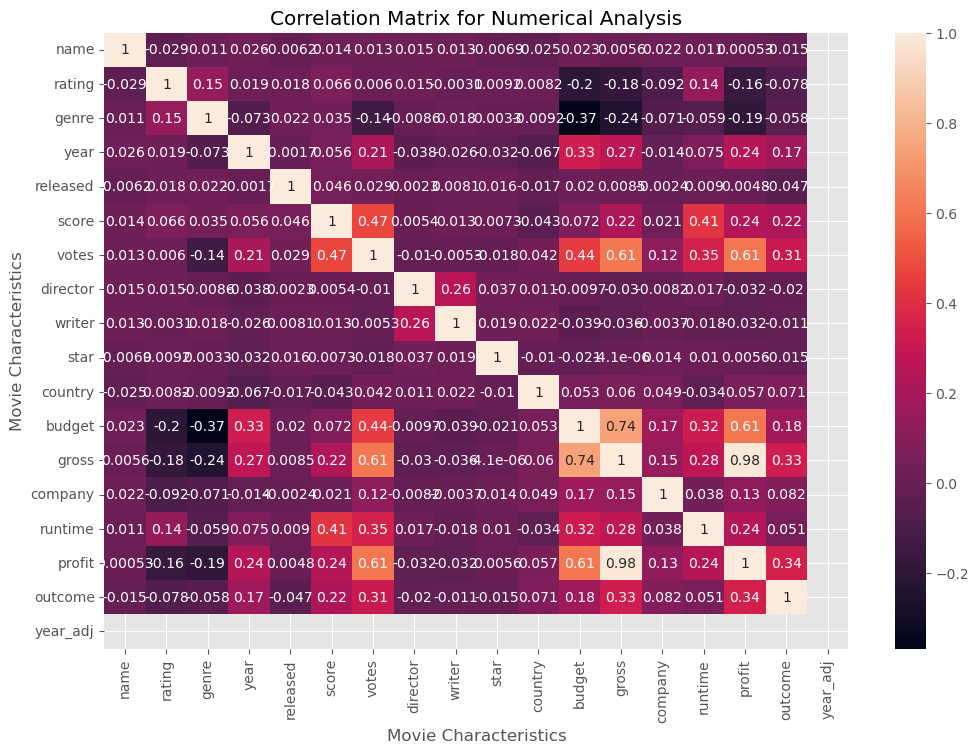

In [244]:
# visualize the correlations through a heatmap
corr_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Matrix for Numerical Analysis')
plt.xlabel('Movie Characteristics')
plt.ylabel('Movie Characteristics')

In [245]:
# get tabular correlations
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,profit,outcome,year_adj
name,1.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,NaN
rating,-0.0,1.0,0.1,0.0,0.0,0.1,0.0,0.0,-0.0,0.0,0.0,-0.2,-0.2,-0.1,0.1,-0.2,-0.1,NaN
genre,0.0,0.1,1.0,-0.1,0.0,0.0,-0.1,-0.0,0.0,0.0,-0.0,-0.4,-0.2,-0.1,-0.1,-0.2,-0.1,NaN
year,0.0,0.0,-0.1,1.0,-0.0,0.1,0.2,-0.0,-0.0,-0.0,-0.1,0.3,0.3,-0.0,0.1,0.2,0.2,NaN
released,-0.0,0.0,0.0,-0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,NaN
score,0.0,0.1,0.0,0.1,0.0,1.0,0.5,0.0,0.0,0.0,-0.0,0.1,0.2,0.0,0.4,0.2,0.2,NaN
votes,0.0,0.0,-0.1,0.2,0.0,0.5,1.0,-0.0,-0.0,-0.0,0.0,0.4,0.6,0.1,0.4,0.6,0.3,NaN
director,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,1.0,0.3,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,NaN
writer,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.3,1.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,NaN
star,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,1.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,NaN


In [251]:
# organize data to identify all correlation pairs stacked by film characteristics
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name      name        1.0
          rating     -0.0
          genre       0.0
          year        0.0
          released   -0.0
                     ... 
year_adj  company     NaN
          runtime     NaN
          profit      NaN
          outcome     NaN
          year_adj    NaN
Length: 324, dtype: float64

In [248]:
# sort the pairs by correlations
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre     budget     -0.4
budget    genre      -0.4
genre     gross      -0.2
gross     genre      -0.2
budget    rating     -0.2
                     ... 
year_adj  company     NaN
          runtime     NaN
          profit      NaN
          outcome     NaN
          year_adj    NaN
Length: 324, dtype: float64

In [250]:
# get all high correlations
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

profit    votes      0.6
votes     profit     0.6
profit    budget     0.6
budget    profit     0.6
gross     votes      0.6
votes     gross      0.6
budget    gross      0.7
gross     budget     0.7
profit    gross      1.0
gross     profit     1.0
name      name       1.0
writer    writer     1.0
runtime   runtime    1.0
company   company    1.0
gross     gross      1.0
budget    budget     1.0
country   country    1.0
star      star       1.0
director  director   1.0
votes     votes      1.0
score     score      1.0
released  released   1.0
year      year       1.0
genre     genre      1.0
rating    rating     1.0
profit    profit     1.0
outcome   outcome    1.0
dtype: float64